# MNIST Computer Vision problem solved with Tensorflow

We can use Tensorflow high-level APIs (like Keras) to solve classic Machine Learning and Computer Vision problems.

In this notebook, we will follow the steps performed to predict written 1-digit numbers from the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

<a href="https://colab.research.google.com/github/gincos/data-science-portfolio/blob/master/tensorflow_tutorials/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, we import the necessary libraries

In [0]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 1 - Import the data

Load the inputs and labels from tf.keras.datasets MNIST.

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

### Step 1.a - Visualize sample

We take a single sample image to visually understand the data matrix.

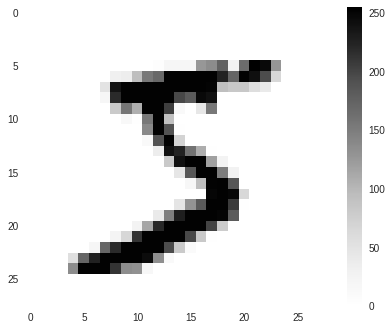

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.figure(figsize=(10, 10))

### Step 1.b - Pre-process data

Images are matrices with values from 0 to 255 that describe the color. We can limit the range to 0 to 1 in order to enhance performance

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Step 1.c - Visualize input and labels

Show a grid in which we see how each input is labeled in the dataset.

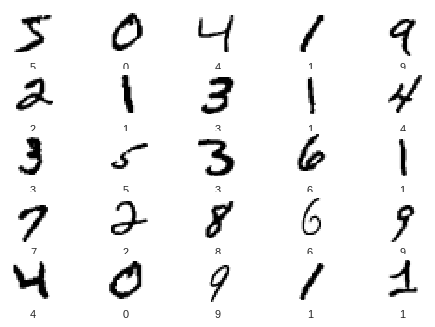

In [19]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Step 2 - Define Neural Network

We use the Keras high-level API in order to define a Neural Network with a pre-process layer, 2 deep layers, and an output layer.


*   It's "Sequential" since its layers are run one after the other.
*   In the pre-process layer, we unpack the (28, 28) matrix into a 784 vector for each item we feed into the model. This makes the overall process quicker and more effective.
*   We have 2 deep layers. The "Dense" means that all their nodes are connected to inputs and outputs (nodes from next layer).
*   The output layer has 10 nodes since we have a class for each number (0 to 9).

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, ))  # Output layer

## Step 3 - Compile the model

Configures the model for training. Here we specify our optimizer and loss functions, and also any metrics we need to evaluate the model.

In [0]:
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

## Step 4 - Train the model

Here we can train the model using train_images and train_labels. This will give value to all weights and biases of the layers we defined.

If already trained, a model can save these values in order to fastly configure a newly compiled model in the same way, therefore it is not necessary to train every time.

In [23]:
# Option 1 - Train
model.fit(train_images, train_labels, epochs=5)

# -------------------  OR  ---------------------

# Option 2 - Save & Restore

# Restore the weights (optional)
# model.load_weights('./checkpoints/saved_weights')

# Step 4.3 - Save the weights (optional)
# model.save_weights('./checkpoints/saved_weights')

Epoch 1/5
60000/60000 [==============================] - 19s 318us/sample - loss: 0.1924 - acc: 0.9423
Epoch 2/5
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0970 - acc: 0.9735
Epoch 3/5
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0778 - acc: 0.9811
Epoch 4/5
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0651 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0599 - acc: 0.9871


## Step 5 - Evaluate

We can analyze the overall performance of the model we trained.

In [0]:
loss, acc = model.evaluate(test_images, test_labels)
print('Loss: ' + str(loss))
print('Accuracy: ' + str(acc))

10000/10000 [==============================] - 1s 77us/sample - loss: 0.1138 - acc: 0.9804
Loss: 0.11382430901235821
Accuracy: 0.9804


### Step 5.1 - Show predicted label for a random image

We can try our model on a random sample from the test set and visualize its results.

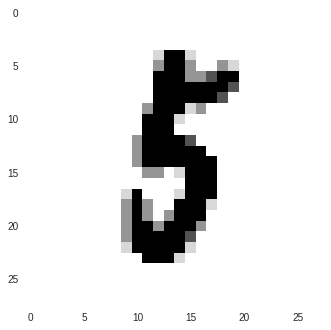


Prediction: 5


<Figure size 720x720 with 0 Axes>

In [0]:
# Get a random integer
random_index = random.randint(0, len(test_images) - 1)

# Predict for given sample number
test_prediction = model.predict(test_images[random_index:random_index + 1])

# Visualize prediction alongside its corresponding image
plt.figure()
plt.imshow(test_images[random_index])
plt.grid(False)
plt.show()
plt.figure(figsize=(10, 10))
print('\nPrediction: '+str(np.argmax(test_prediction)))